In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

570

In [5]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('+++++++++++++++++++++++++++++')

# raw_cities = ['Seattle', 'Los Angeles', 'Chicago', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('+++++++++++++++++++++++++++++')
print('Data Retrieval Complete')
print('+++++++++++++++++++++++++++++')

Beginning Data Retrieval
+++++++++++++++++++++++++++++
processing Record 1 of Set 1 | pevek
processing Record 2 of Set 1 | thompson
processing Record 3 of Set 1 | dikson
processing Record 4 of Set 1 | rikitea
processing Record 5 of Set 1 | port alfred
processing Record 6 of Set 1 | isangel
processing Record 7 of Set 1 | albany
processing Record 8 of Set 1 | lazarev
processing Record 9 of Set 1 | alice springs
processing Record 10 of Set 1 | birjand
processing Record 11 of Set 1 | coahuayana
processing Record 12 of Set 1 | villa carlos paz
processing Record 13 of Set 1 | kaitangata
processing Record 14 of Set 1 | sinnamary
processing Record 15 of Set 1 | bluff
processing Record 16 of Set 1 | longyearbyen
processing Record 17 of Set 1 | jamestown
processing Record 18 of Set 1 | severo-kurilsk
processing Record 19 of Set 1 | cape town
processing Record 20 of Set 1 | hobart
processing Record 21 of Set 1 | hasaki
processing Record 22 of Set 1 | butaritari
processing Record 23 of Set 1 | sas

City sinkat not found. Skipping...
processing Record 33 of Set 4 | suzdal
processing Record 34 of Set 4 | cabo san lucas
processing Record 35 of Set 4 | kapuskasing
processing Record 36 of Set 4 | ulaangom
processing Record 37 of Set 4 | hamilton
processing Record 38 of Set 4 | rio gallegos
processing Record 39 of Set 4 | purwodadi
processing Record 40 of Set 4 | sibolga
processing Record 41 of Set 4 | ust-kuyga
processing Record 42 of Set 4 | munak
processing Record 43 of Set 4 | la asuncion
processing Record 44 of Set 4 | bonthe
processing Record 45 of Set 4 | batagay-alyta
processing Record 46 of Set 4 | oksfjord
processing Record 47 of Set 4 | oktyabrskoye
processing Record 48 of Set 4 | san patricio
processing Record 49 of Set 4 | prince rupert
processing Record 50 of Set 4 | kambove
processing Record 1 of Set 5 | bengkulu
processing Record 2 of Set 5 | burnie
processing Record 3 of Set 5 | armeria
processing Record 4 of Set 5 | lagoa
processing Record 5 of Set 5 | aklavik
process

processing Record 17 of Set 8 | dunedin
processing Record 18 of Set 8 | tasiilaq
processing Record 19 of Set 8 | artyk
City artyk not found. Skipping...
processing Record 20 of Set 8 | praia
processing Record 21 of Set 8 | muroto
processing Record 22 of Set 8 | flin flon
processing Record 23 of Set 8 | ust-kamchatsk
City ust-kamchatsk not found. Skipping...
processing Record 24 of Set 8 | neka
processing Record 25 of Set 8 | dese
processing Record 26 of Set 8 | tilichiki
processing Record 27 of Set 8 | kyren
processing Record 28 of Set 8 | okhotsk
processing Record 29 of Set 8 | ambunti
processing Record 30 of Set 8 | itaituba
processing Record 31 of Set 8 | ouesso
processing Record 32 of Set 8 | koutiala
processing Record 33 of Set 8 | mehriz
processing Record 34 of Set 8 | kilindoni
processing Record 35 of Set 8 | linjiang
processing Record 36 of Set 8 | buribay
processing Record 37 of Set 8 | daru
processing Record 38 of Set 8 | bairiki
processing Record 39 of Set 8 | chagda
City ch

processing Record 3 of Set 12 | sobolevo
processing Record 4 of Set 12 | zapotiltic
processing Record 5 of Set 12 | itanhem
processing Record 6 of Set 12 | ariquemes
processing Record 7 of Set 12 | presidencia roque saenz pena
processing Record 8 of Set 12 | enid
processing Record 9 of Set 12 | chuguyevka
processing Record 10 of Set 12 | niamey
processing Record 11 of Set 12 | meulaboh
processing Record 12 of Set 12 | tarauaca
processing Record 13 of Set 12 | salmon arm
processing Record 14 of Set 12 | puerto el triunfo
processing Record 15 of Set 12 | aldan
processing Record 16 of Set 12 | shenjiamen
processing Record 17 of Set 12 | zhigansk
processing Record 18 of Set 12 | conde
processing Record 19 of Set 12 | kodinsk
processing Record 20 of Set 12 | kudat
+++++++++++++++++++++++++++++
Data Retrieval Complete
+++++++++++++++++++++++++++++


# Insert Raw Data in Dataframe

In [6]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [11]:
#  Display the DataFrame

cityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-35.84,98,100,2.28,RU,1672606325
1,Thompson,55.7435,-97.8558,3.36,85,75,6.91,CA,1672606326
2,Dikson,73.5069,80.5464,-16.65,98,100,9.06,RU,1672606326
3,Rikitea,-23.1203,-134.9692,77.77,74,100,13.20,PF,1672606327
4,Port Alfred,-33.5906,26.8910,69.19,88,4,4.00,ZA,1672606320


In [12]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          522
Lat           522
Lng           522
Max Temp      522
Humidity      522
Cloudiness    522
Wind Speed    522
Country       522
Date          522
dtype: int64

In [13]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          522
Lat           522
Lng           521
Max Temp      484
Humidity       82
Cloudiness     89
Wind Speed    325
Country       110
Date          392
dtype: int64

In [14]:
# Export Data into .csv file
cityWeatherDF.to_csv("../Output/city_weather.csv", index=False)

# Inspect the data and remove the cities where the humidity > 100%.

In [15]:
#Skip if no cities with humidity of 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,20.588293,18.328844,49.671284,75.126437,57.434866,8.460556,1.672606e+09
std,33.526540,91.141263,33.217465,19.711433,39.497182,6.203584,1.429602e+02
min,-54.800000,-179.166700,-46.460000,11.000000,0.000000,0.000000,1.672606e+09
25%,-7.698450,-62.390300,32.672500,65.000000,18.250000,3.880000,1.672606e+09
50%,25.021100,24.960700,61.585000,78.000000,72.000000,6.910000,1.672607e+09
75%,49.881725,96.932125,75.442500,90.000000,99.000000,11.500000,1.672607e+09
max,78.218600,178.416700,96.730000,100.000000,100.000000,48.340000,1.672607e+09


## Focusing on humidity values, we find that 20 cities have 100% humidity.

In [16]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 99]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
64,Alekseyevsk,57.8406,108.3492,-30.59,100,21,2.82,RU,1672606368
160,Saint Paul Harbor,57.7900,-152.4072,38.71,100,100,12.66,US,1672606444
164,Suzdal,56.4281,40.4414,34.29,100,100,8.61,RU,1672606329
186,Aklavik,68.2191,-135.0107,-16.96,100,86,7.81,CA,1672606462
222,Yar-Sale,66.8333,70.8333,-32.82,100,59,3.85,RU,1672606489
235,Erdenet,49.0333,104.0833,-13.58,100,35,3.87,MN,1672606498
249,Nadym,65.5333,72.5167,-34.56,100,35,4.23,RU,1672606509
255,Esso,55.9333,158.7000,-1.93,100,100,4.45,RU,1672606513
277,Novopavlovka,51.2172,109.2091,-20.63,100,91,1.36,RU,1672606534
294,Toora-Khem,52.4675,96.1100,-17.30,100,99,0.89,RU,1672606545


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-35.84,98,100,2.28,RU,1672606325
1,Thompson,55.7435,-97.8558,3.36,85,75,6.91,CA,1672606326
2,Dikson,73.5069,80.5464,-16.65,98,100,9.06,RU,1672606326
3,Rikitea,-23.1203,-134.9692,77.77,74,100,13.20,PF,1672606327
4,Port Alfred,-33.5906,26.8910,69.19,88,4,4.00,ZA,1672606320
5,Isangel,-19.5500,169.2667,82.51,78,79,11.50,VU,1672606194
6,Albany,42.6001,-73.9662,43.66,75,100,7.70,US,1672606329
7,Lazarev,52.2250,141.5131,-17.16,80,23,8.43,RU,1672606329
8,Alice Springs,-23.7000,133.8833,76.55,83,93,5.75,AU,1672606330
9,Birjand,32.8663,59.2211,30.67,51,0,0.00,IR,1672606331


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# 
Latitude vs. Temperature Plot

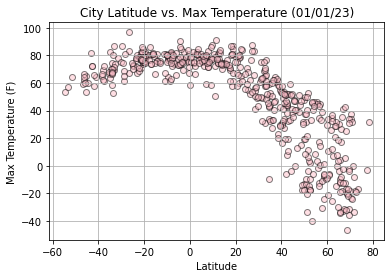

In [18]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

In [19]:
# Latitude vs. Humidity Plot


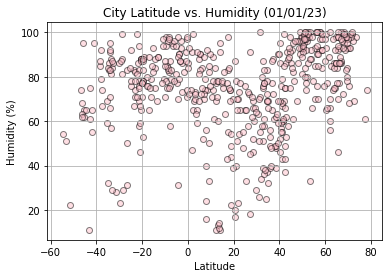

In [20]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

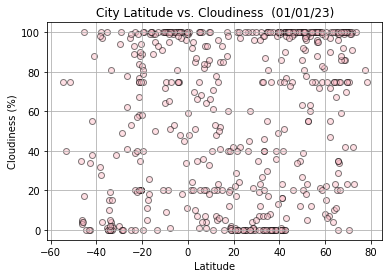

In [21]:
# Latitude vs. Cloudiness Plot

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

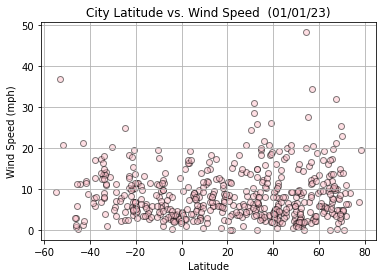

In [22]:
# Latitude vs. Wind Speed

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

In [23]:
# Linear Regression


def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values, color='pink', alpha=0.5, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=13,color="black")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()


In [24]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-35.84,98,100,2.28,RU,1672606325
1,Thompson,55.7435,-97.8558,3.36,85,75,6.91,CA,1672606326
2,Dikson,73.5069,80.5464,-16.65,98,100,9.06,RU,1672606326
6,Albany,42.6001,-73.9662,43.66,75,100,7.70,US,1672606329
7,Lazarev,52.2250,141.5131,-17.16,80,23,8.43,RU,1672606329


In [25]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Rikitea,-23.1203,-134.9692,77.77,74,100,13.20,PF,1672606327
4,Port Alfred,-33.5906,26.8910,69.19,88,4,4.00,ZA,1672606320
5,Isangel,-19.5500,169.2667,82.51,78,79,11.50,VU,1672606194
8,Alice Springs,-23.7000,133.8833,76.55,83,93,5.75,AU,1672606330
11,Villa Carlos Paz,-31.4241,-64.4978,78.39,28,38,13.00,AR,1672606332


In [26]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

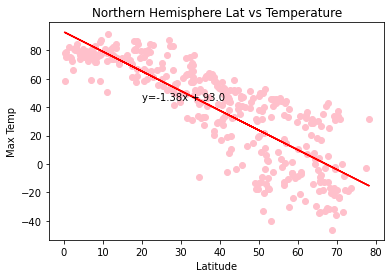

In [27]:
plt.scatter(northernHemisphereDF["Lat"], northernHemisphereDF["Max Temp"], color='pink')
x_axis = northernHemisphereDF["Lat"]
y_axis = northernHemisphereDF["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

The r-squared is: 0.6905898845700019


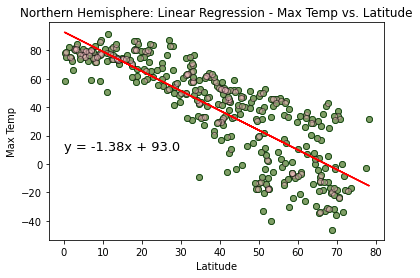

In [28]:
# Add the linear regression equation and line to plot
plt.scatter(northernHemisphereDF['Lat'],northernHemisphereDF['Max Temp'], color='green')
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']


plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.2621169182704131


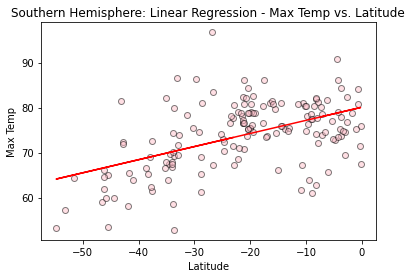

In [29]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.17970195847436365


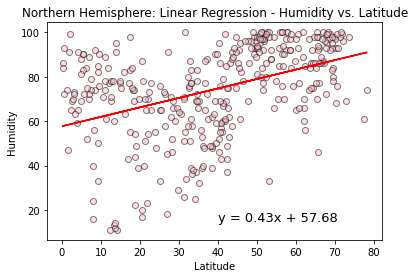

In [30]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.15684388925770407


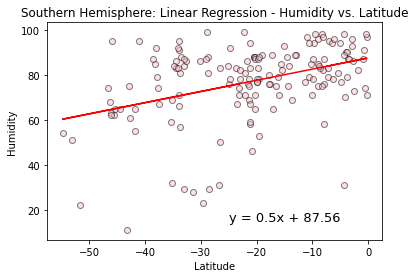

In [31]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.08255913685803928


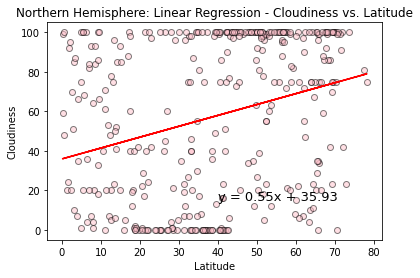

In [32]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.2174215851780745


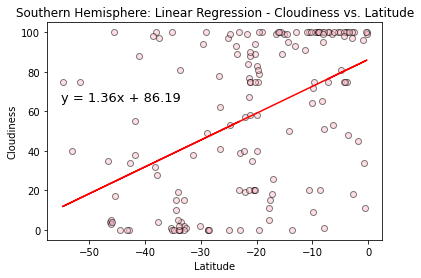

In [33]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.003136917590094791


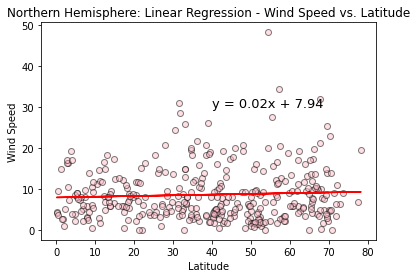

In [34]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.11603043954427188


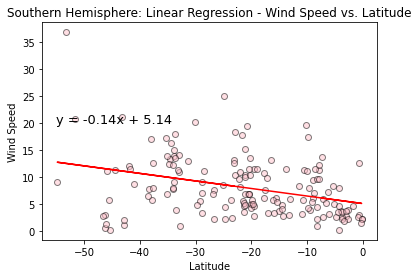

In [35]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)